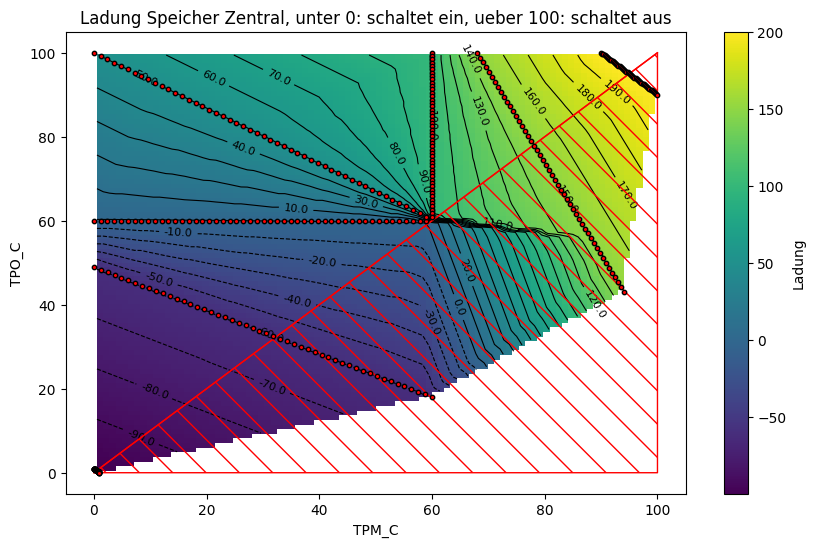

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

lines = [
    # (x1, y1, x2, y2, value)
    (0, 60, 59, 60, 0), 
    (60, 100, 60, 61, 100),
    (59, 61, 0, 100, 50),
    (0, 1,1, 0, -100),
    (0, 49,60, 18, -60),
    (68, 100,94, 43, 150),
    (90, 100, 100, 90, 200),
]

x = []
y = []
z = []

for (x1, y1, x2, y2, value) in lines:
    num_points = 50
    xi = np.linspace(x1, x2, num_points)
    yi = np.linspace(y1, y2, num_points)
    # Falls Linien vertikal oder horizontal sind
    if x1 == x2:  # vertikal
        yi = np.linspace(y1, y2, num_points)
        xi = np.full_like(yi, x1)
    elif y1 == y2:  # horizontal
        xi = np.linspace(x1, x2, num_points)
        yi = np.full_like(xi, y1)
    
    x.extend(xi)
    y.extend(yi)
    z.extend([value] * num_points)
x = np.array(x)
y = np.array(y)
z = np.array(z)
points = np.c_[x, y]
interpolator = LinearNDInterpolator(points, z)
X = np.linspace(min(x) - 5, max(x) + 5, 100)
Y = np.linspace(min(y) - 5, max(y) + 5, 100)
X, Y = np.meshgrid(X, Y)
Z = interpolator(X, Y)
levels = np.arange(-100, 200, 10)
plt.figure(figsize=(10, 6))
plt.title("Ladung Speicher Zentral, unter 0: schaltet ein, ueber 100: schaltet aus")
plt.imshow(Z, extent=(min(x) - 5, max(x) + 5, min(y) - 5, max(y) + 5), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Ladung')
contour = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.8)
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f', colors='black')
plt.scatter(x, y, color='red', edgecolor='k', s=10, zorder=5)
plt.xlabel("TPM_C")
plt.ylabel("TPO_C")
plt.plot([0, 100], [0, 100], color='red', linewidth=1)
plt.fill_between(x=np.linspace(0, 100, 500), y1=0, y2=np.linspace(0, 100, 500), 
                 where=(np.linspace(0, 100, 500) <= np.linspace(0, 100, 500)), 
                 facecolor='none', hatch= ('\\'), edgecolor='red', alpha=1, zorder=4)
plt.show()
